In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("./files/Smruti Sonekar - data_science_job.csv")

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
 # % of missing data
m=df.isnull().sum()
l=len(df)
ans=(m*100)/l
ans

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

Apply CCA on on the data having missing data less than 5%

In [7]:
# Extract only those columns whose missing values are less than 5%
a=(ans < 5) & (ans > 0)
result_df= a.loc[a==True]
result_df
#not correct method to print the list,its correct but it does not print the list

city_development_index    True
enrolled_university       True
education_level           True
experience                True
training_hours            True
dtype: bool

In [8]:
cols=[var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols
#correct method

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
b=df[cols]
b

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [10]:
new_df=df[cols].dropna()
df.shape ,new_df.shape

((19158, 13), (17182, 5))

In [11]:
 # % of data remaining after removing rows having missing valoes less than 5%
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [12]:
 # create new DF after dropping missing values from those selected columns having < 0.5 missing data
df.shape, new_df.shape

((19158, 13), (17182, 5))

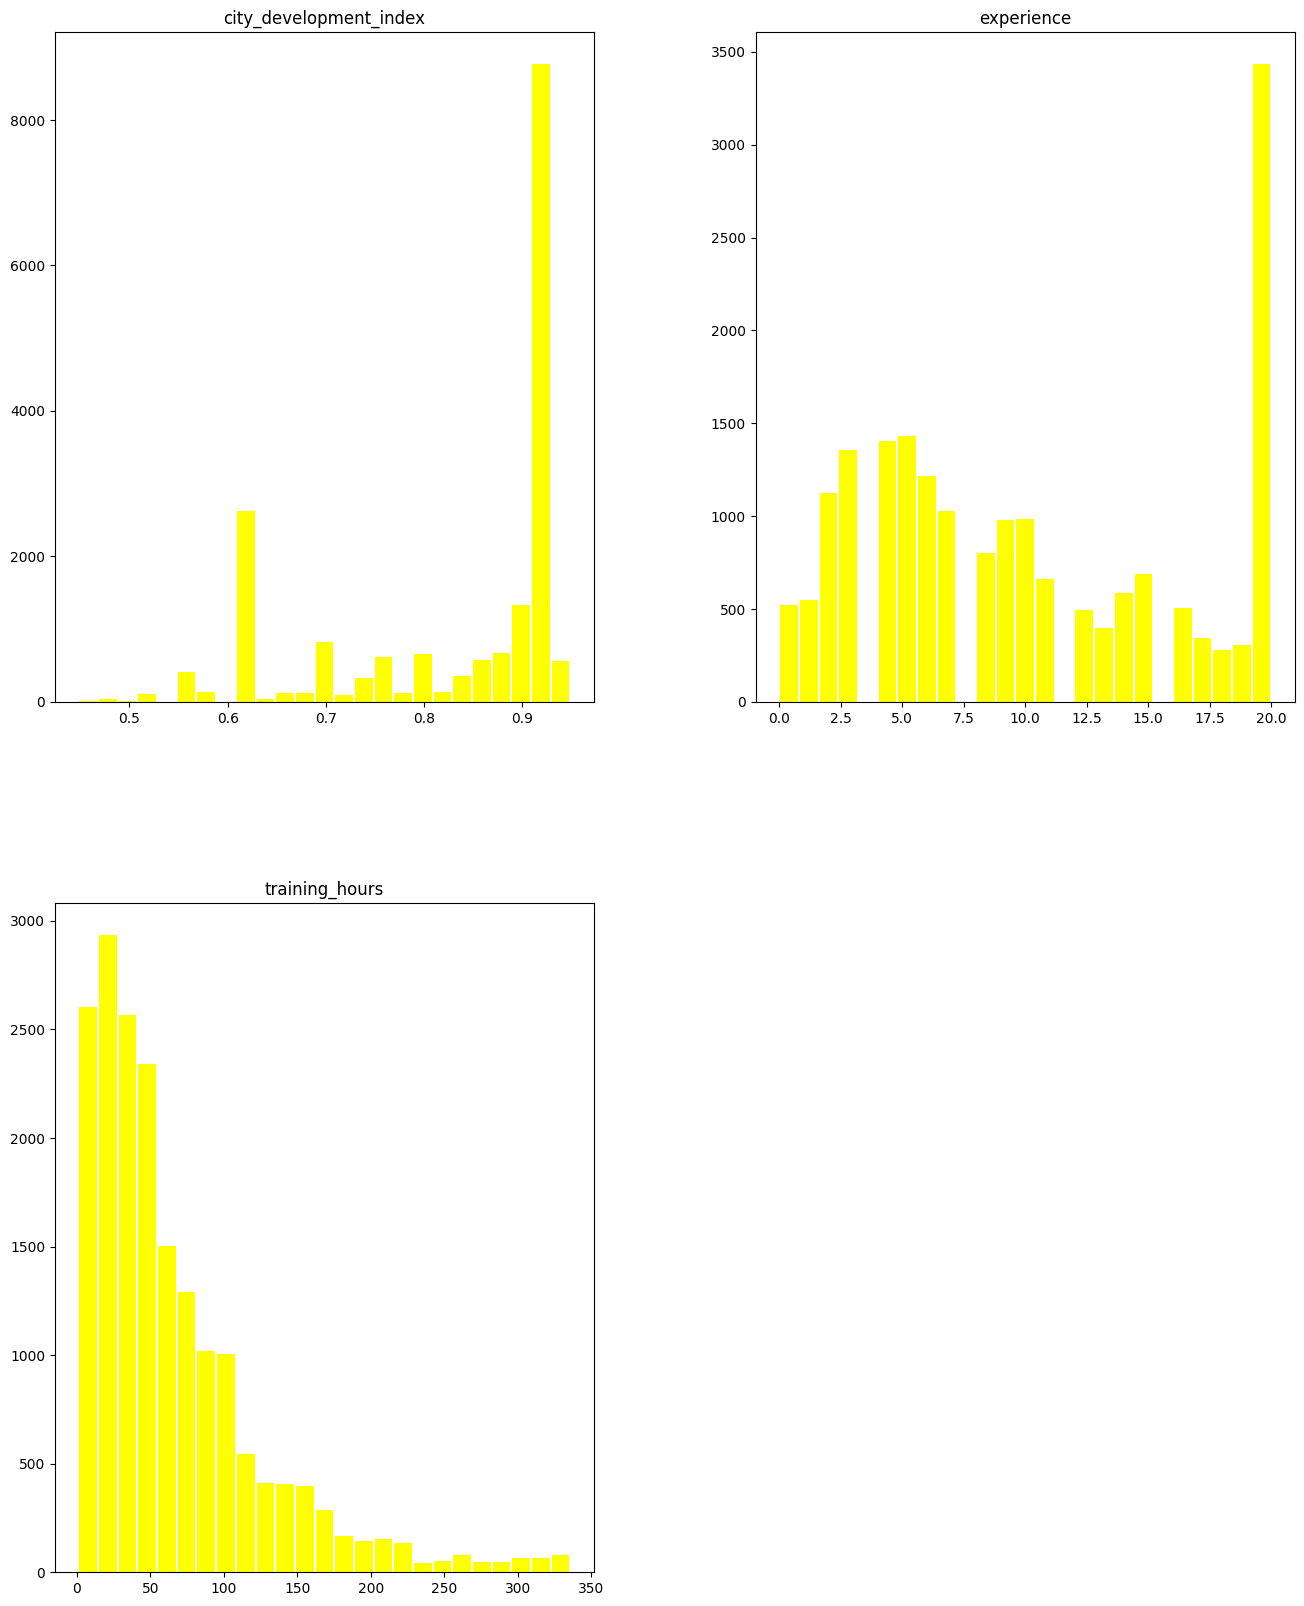

In [20]:
#plot histogram of new_df
ax = df.hist(column=cols, bins=25, grid=False, figsize=(16,20), color='yellow', zorder=2, rwidth=0.9)

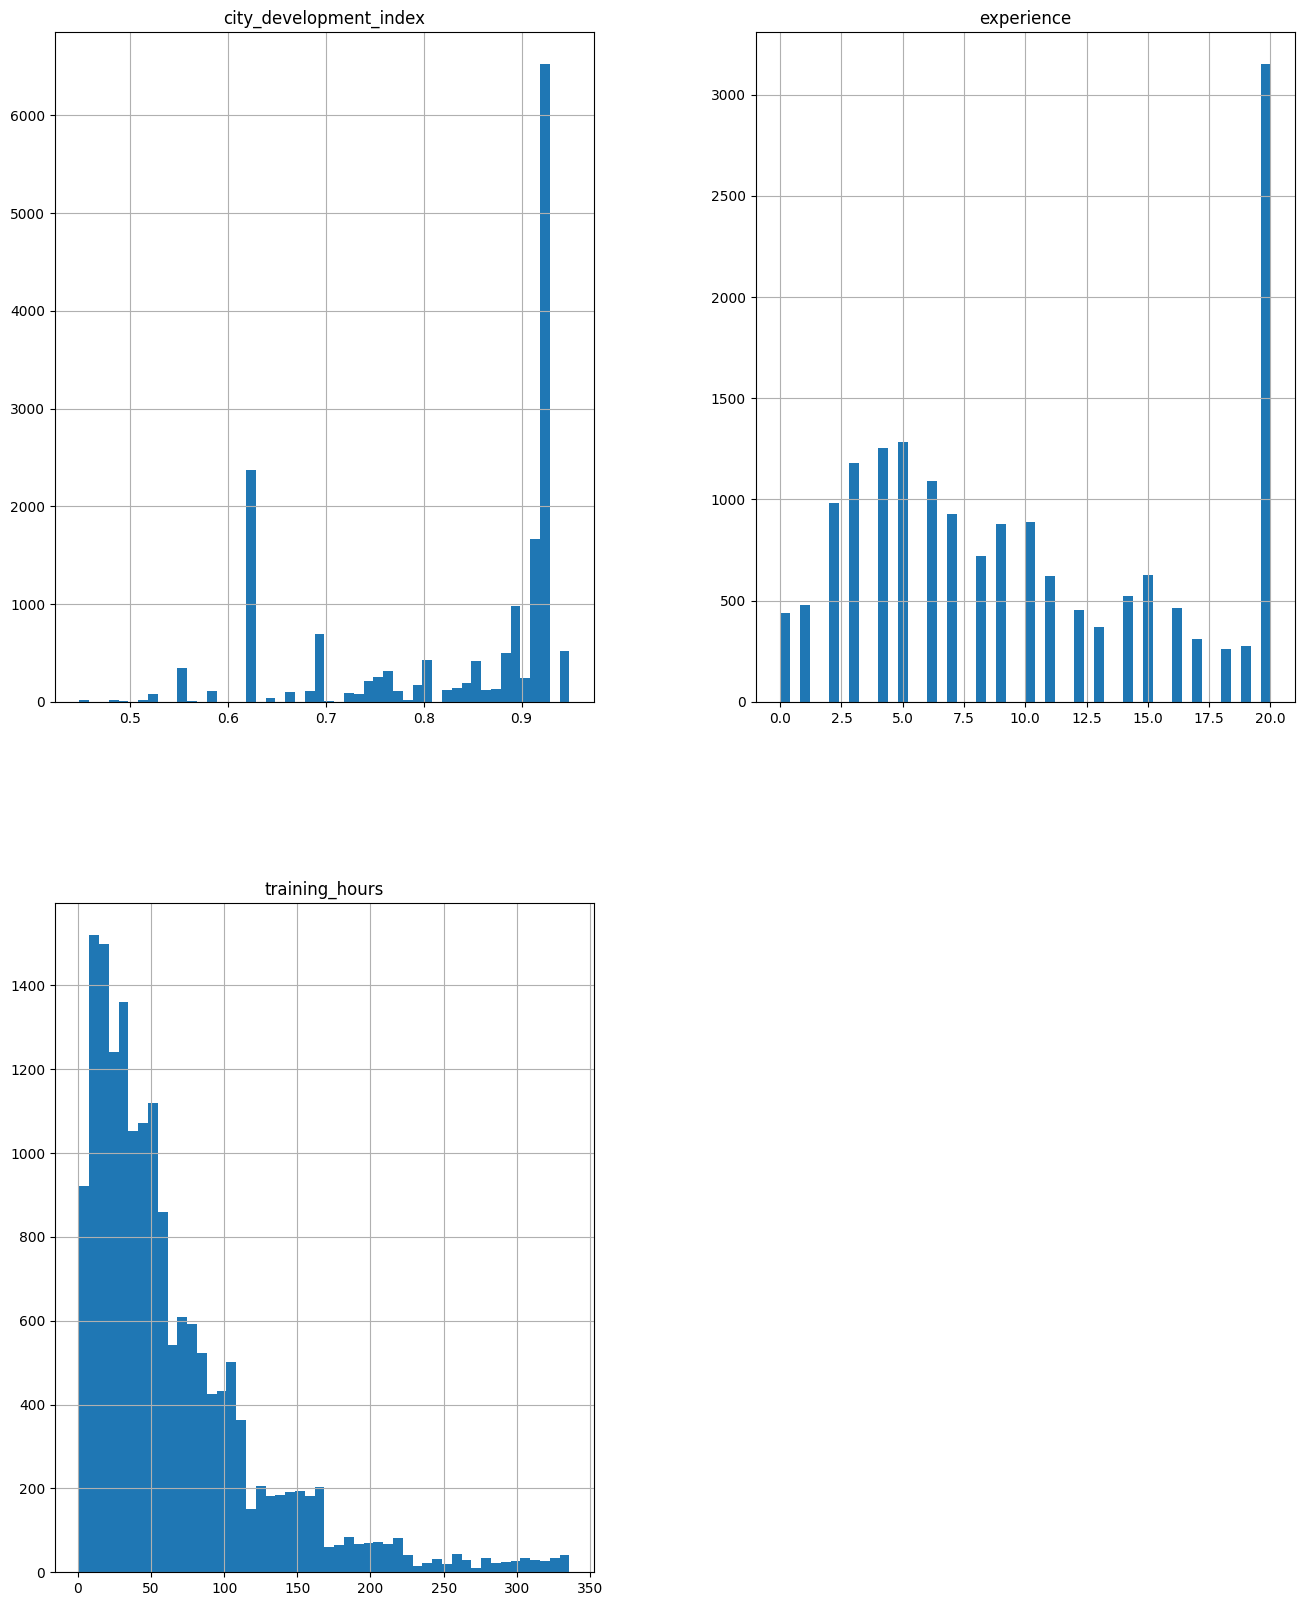

In [21]:
#plot histogram of new_df
new_df.hist(figsize=(16,20),bins=50)
plt.show()

<Axes: >

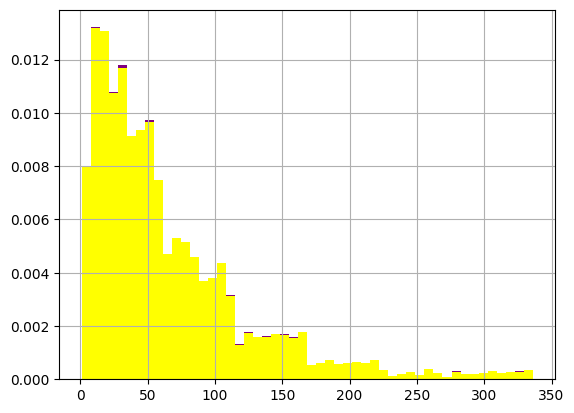

In [32]:
#plot histogram of new_df
fig=plt.figure()
ax=fig.add_subplot(111)
new_df['training_hours'].hist(bins=50, ax=ax,density=True,color='purple')
df['training_hours'].hist(bins=50, ax=ax,density=True,color='yellow')


<Axes: >

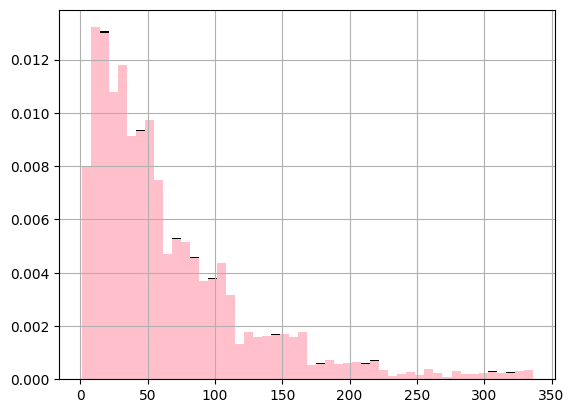

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of numerical columns of original data
df['training_hours'].hist(bins=50, density=True,color='black')

# see the overlay of the 2 distributions
# plot hostogram of new df data after cca, the argument alpha makes the color transparent set alpha-0.8, so we can
new_df['training_hours'].hist(bins=50, density=True,color='pink')


<Axes: ylabel='Density'>

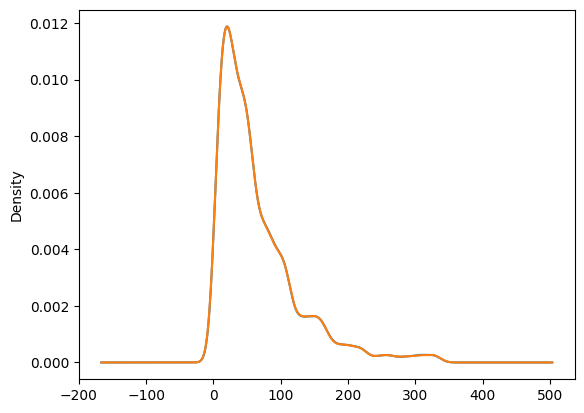

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data kde plot of numerical columns
df['training_hours'].plot(kind="kde")
# data after cca kde plot of numerical columns
# see the overlay of the 2 distributions
new_df['training_hours'].plot(kind="kde")

<Axes: >

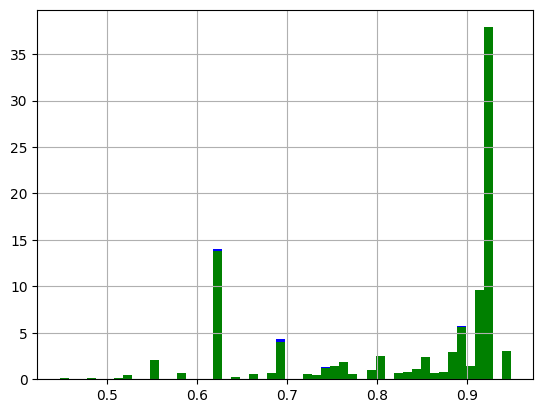

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of numerical columns of original data
df['city_development_index'].hist(bins=50, density=True,color='blue')

# see the overlay of the 2 distributions
# plot hostogram of new df data after cca, the argument alpha makes the color transparent set alpha-0.8, so we can
new_df['city_development_index'].hist(bins=50, density=True,color='green')

<Axes: ylabel='Density'>

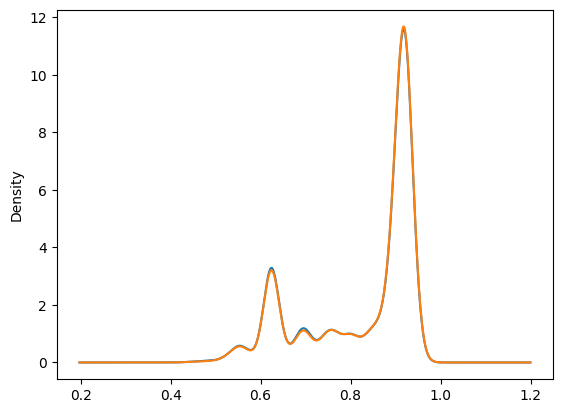

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['city_development_index'].plot(kind='kde')
new_df['city_development_index'].plot(kind='kde')

<Axes: ylabel='Density'>

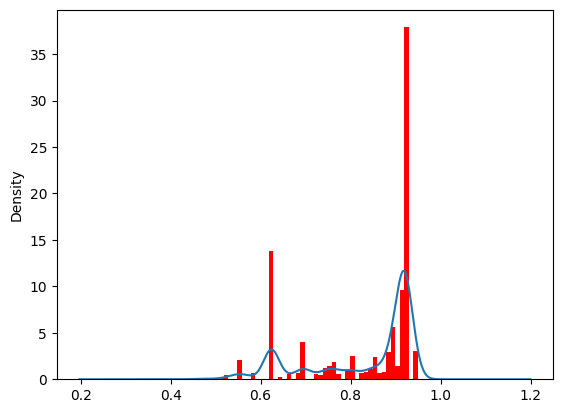

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
new_df['city_development_index'].hist(bins=50, density=True,color='red')
new_df['city_development_index'].plot(kind='kde')

<Axes: ylabel='Density'>

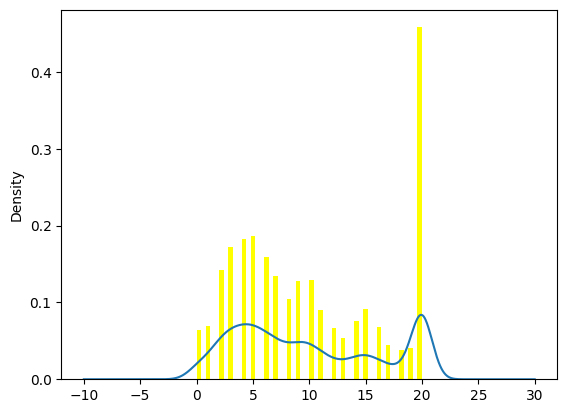

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['experience'].hist(bins=50, density=True,color='yellow')
new_df['experience'].hist(bins=50, density=True,color='yellow')


<Axes: ylabel='Density'>

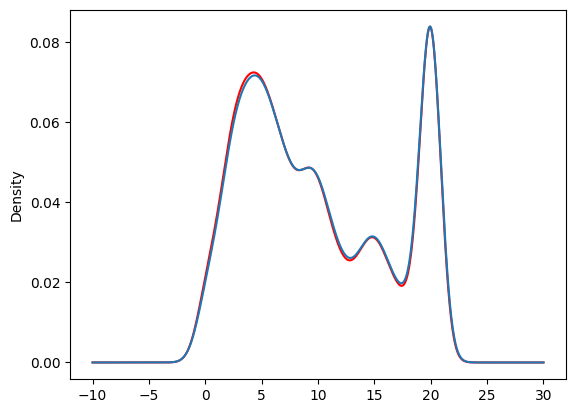

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['experience'].plot(kind='kde',color='red')
new_df['experience'].plot(kind='kde')

<Axes: ylabel='Density'>

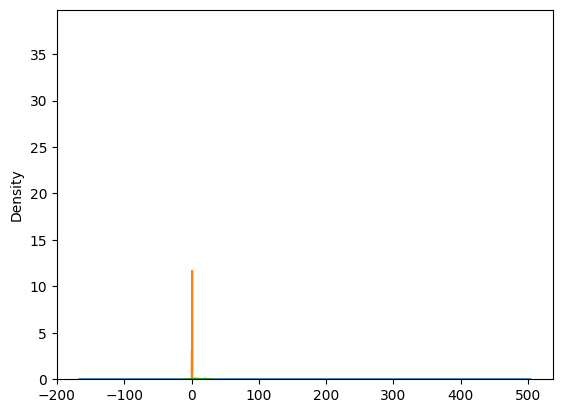

In [19]:
new_df['training_hours'].hist(bins=50, density=True,color='purple')
new_df['training_hours'].plot(kind='kde')
new_df['city_development_index'].hist(bins=50, density=True,color='red')
new_df['city_development_index'].plot(kind='kde')
new_df['experience'].hist(bins=50, density=True,color='yellow')
new_df['experience'].plot(kind='kde')

                     original Data  cca Data
enrolled_university                         
no_enrollment             0.721213  0.735188
Full time course          0.196106  0.200733
Part time course          0.062533  0.064079


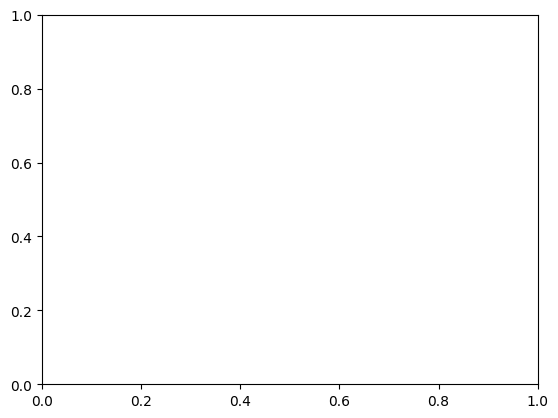

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data kde plot of numerical columns

# data after cca kde plot of numerical columns
# see the overlay of the 2 distributions
temp=pd.concat([
#original data
df['enrolled_university'].value_counts()/len(df),
# original data hist plot of numerical columns

#cca data
# hist plot of data after cca, the argument alpha makes the color transparent, so we can
new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)
# see the overlay of the 2 distributions
temp.columns=['original Data','cca Data']
print(temp)

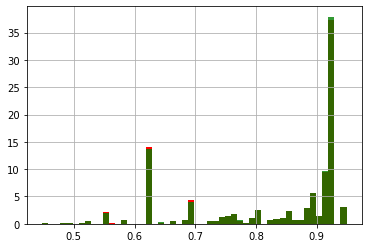

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data hist plot of numerical columns

df['training_hours'].hist(bins=50, ax=ax,density=True,color='yellow')

# hist plot of data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax,density=True,color='purple')

<Axes: ylabel='Density'>

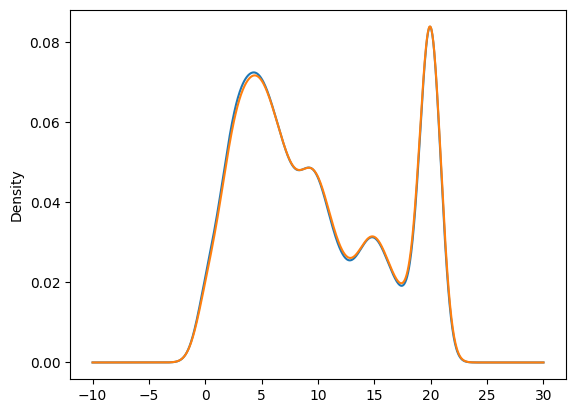

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data density plot
df['experience'].plot(kind="kde")

# data after cca density plot
new_df['experience'].plot(kind="kde")

<Axes: >

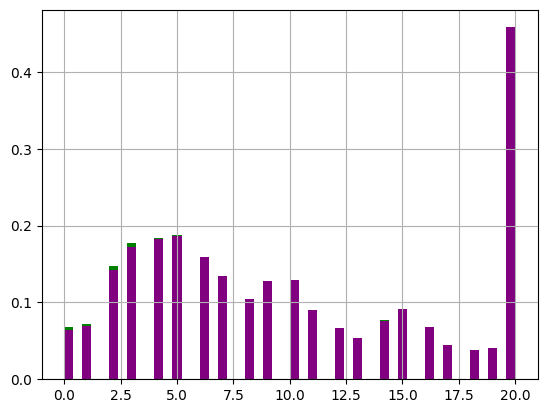

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data hist plot of 'experience' column
df['experience'].hist(bins=50,ax=ax,density=True,color='green')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax,density=True,color='purple')


<Axes: ylabel='Density'>

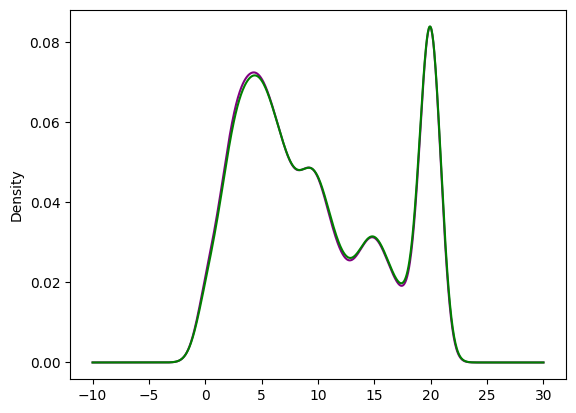

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data kde plot of 'experience' column
df['experience'].plot(kind='kde',color='purple')
# data after cca kde plot of 'experience' column
new_df['experience'].plot(kind='kde',color='green')

In [54]:
new_df['enrolled_university'].value_counts()/len(new_df)

enrolled_university
no_enrollment       0.735188
Full time course    0.200733
Part time course    0.064079
Name: count, dtype: float64

In [55]:
#origional data enrolled_university column %percentage of count (/len(df))
df['enrolled_university'].value_counts()/len(df)

enrolled_university
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: count, dtype: float64

In [59]:
#origional data enrolled_university column %percentage of count (/len(df))
temp=pd.concat([df['education_level'].value_counts()/len(df),new_df['education_level'].value_counts()/len(new_df)],axis=1)
temp

,count,count
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [ ]:

# add column names
temp.columns = ['original', 'cca']

temp


,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
